## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

#Tensorflow 설치하기
# !pip install Tensorflow

In [5]:
import tensorflow as tf

* 데이터 프레임 관련 라이브러리

In [4]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

### **나.  학습데이터 불러오기**

In [5]:
df = pd.read_csv("df_train.csv", sep = ",")
x = df.drop("label", axis = 1)
y = df.loc[:, "label"]

### **다.  데이터 전처리**

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2021)

In [7]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# 선언하기
model = DecisionTreeClassifier(random_state = 1)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 5)

# 결과확인
print("평균 : ", cv_score.mean())

# 결과수집
result = {}
result["Decision Tree"] = cv_score.mean()

평균 :  0.9332420682638054


In [23]:
# 선언하기
model = LogisticRegression(max_iter = 2067)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result['Logistic Regression'] = cv_score.mean()

평균: 0.8338063083896031


In [24]:
# 선언하기
model = RandomForestClassifier(random_state = 1)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 5)

# 결과확인
print("평균 : ", cv_score.mean())

# 결과수집
result["Random Forest"] = cv_score.mean()

평균 :  0.9574877439644804


In [25]:
# 선언하기
model = XGBClassifier(random_state = 1)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 5)

# 결과확인
print("평균 : ", cv_score.mean())

# 결과수집
result["XGBoost"] = cv_score.mean()

평균 :  0.9610002158295563


In [26]:
# 선언하기
model = LGBMClassifier(random_state = 1)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 5)

# 결과확인
print("평균 : ", cv_score.mean())

# 결과수집
result["LightGBM"] = cv_score.mean()

평균 :  0.9602984614435914


In [27]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Decision Tree 0.933
Logistic Regression 0.834
Random Forest 0.957
XGBoost 0.961
LightGBM 0.96


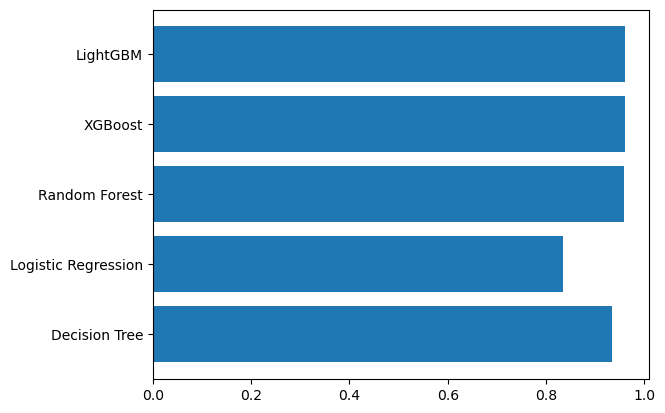

In [28]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

In [22]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
# 선언하기
model = XGBClassifier(random_state = 1)

# 3단계: 학습하기
model.fit(x_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[356  23]
 [  7 326]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       379
           1       0.93      0.98      0.96       333

    accuracy                           0.96       712
   macro avg       0.96      0.96      0.96       712
weighted avg       0.96      0.96      0.96       712



---

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [11]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [12]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


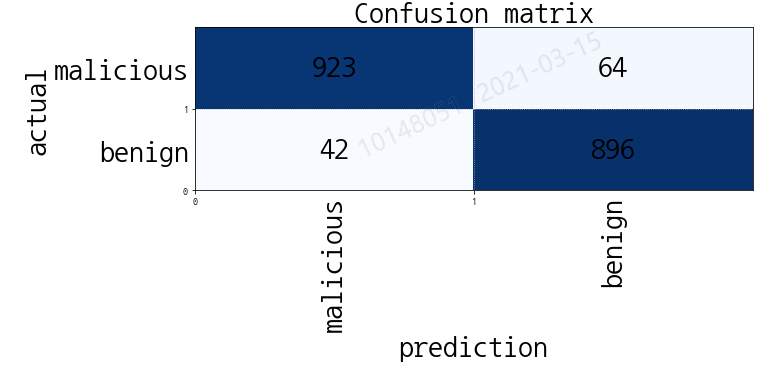

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [5]:
# 1. import
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# 2.선언 
# model = DecisionTreeClassifier(max_depth = 11) #test_size = 0.3, 0.94
model = DecisionTreeClassifier() #test_size = 0.2, 0.96

# 3. fit(), 학습
model.fit(x_train, y_train)

# 4. predict(), 예측
y_pred = model.predict(x_test)

# Test 데이터 결과 Confusion Matrix 확인
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[348  31]
 [ 14 319]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       379
           1       0.91      0.96      0.93       333

    accuracy                           0.94       712
   macro avg       0.94      0.94      0.94       712
weighted avg       0.94      0.94      0.94       712



In [8]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
# 2단계: 선언하기
model = LogisticRegression(max_iter = 1500) #0.85

# 3단계: 학습하기
model.fit(x_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[305  74]
 [ 56 277]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       379
           1       0.79      0.83      0.81       333

    accuracy                           0.82       712
   macro avg       0.82      0.82      0.82       712
weighted avg       0.82      0.82      0.82       712



In [40]:
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT. 경고가 뜨면 max_iter 값을 크게 늘려준다

In [9]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_pre = scaler.transform(x_train)
x_test_pre = scaler.transform(x_test)

In [10]:
# 1단계: 불러오기
from sklearn.svm import SVC

# 2단계: 선언하기, rbf로 하면 정확도가 조금 떨어진다, cost를 낮춰도 별 차이가 없다
#커널이 무엇일 때 좋을지 고려해야 한다
#정확도가 높으면서 최소 비용을 잘 찾아보자

model = SVC(kernel = "linear", C = 116) #0.84
# model = SVC(kernel = "rbf", C = 1890) #0.90

# 3단계: 학습하기
model.fit(x_train_pre, y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test_pre)

# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[278  41]
 [ 66 229]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       319
           1       0.85      0.78      0.81       295

    accuracy                           0.83       614
   macro avg       0.83      0.82      0.82       614
weighted avg       0.83      0.83      0.83       614

